In [28]:
import numpy as np
import pandas as pd 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import decomposition
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from mpl_toolkits import mplot3d
from sklearn.linear_model import LogisticRegression
import json
from sklearn.ensemble import VotingClassifier

In [29]:
#게임 기록 불러오기
data = pd.read_csv('games.csv')

In [30]:
data.shape

(51490, 61)

In [4]:
#필요없는 요수 지우기
del data['gameId']
del data['creationTime']
del data['seasonId']

#게임 결과에 너무 큰 영향을 미치는 요소 지우기
del data['t1_towerKills']
del data['t1_inhibitorKills']
del data['t2_towerKills']
del data['t2_inhibitorKills']

#게임 시간이 10분 이하인 게임판 지우기
data = data.loc[data["gameDuration"] >= 10*60,:]

In [6]:
data

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,...,t2_champ5_sum1,t2_champ5_sum2,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,1949,1,2,1,1,1,1,2,8,12,...,4,3,0,1,1,114,67,43,16,51
1,1851,1,1,1,1,0,1,1,119,7,...,4,7,0,0,0,11,67,238,51,420
2,1493,1,2,1,1,1,2,0,18,4,...,7,4,0,1,0,157,238,121,57,28
3,1758,1,1,1,1,1,1,0,57,4,...,4,7,0,0,0,164,18,141,40,51
4,2094,1,2,1,1,1,1,0,19,4,...,4,7,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,1944,2,1,2,2,0,2,0,19,12,...,11,4,0,4,0,55,-1,90,238,157
51486,3304,2,1,1,2,2,2,2,90,4,...,14,4,4,4,1,157,55,119,154,105
51487,2156,2,2,2,2,0,1,0,141,11,...,14,4,0,2,0,113,122,53,11,157
51488,1475,2,2,2,2,0,2,0,121,11,...,11,4,0,1,0,154,39,51,90,114


In [7]:
#test train 데이터 나누기
data = data.to_numpy()
train = data[:40286]
train_y = train[:,1]
train_x = np.delete(train, 1, axis=1)

test = data[40286:]
test_y = test[:,1]
test_x = np.delete(test, 1, axis=1)

In [10]:
# 2차원 PCA
pca = decomposition.PCA(n_components=2)
projected_pca2 =pca.fit_transform(train_x)
projected_pca_test2 = pca.transform(test_x)
print ("shape of library PCA 2D: " , projected_pca2.shape)

# 3차원 PCA
pca = decomposition.PCA(n_components=3)
projected_pca3 =pca.fit_transform(train_x)
print ("shape of library PCA 3D: " , projected_pca3.shape)

# 10차원 PCA
pca = decomposition.PCA(n_components=10)
projected_pca10 =pca.fit_transform(train_x)
projected_pca_test10 = pca.transform(test_x)
print ("shape of library PCA 10D: " , projected_pca10.shape)


shape of library PCA 2D:  (40286, 2)
shape of library PCA 3D:  (40286, 3)
shape of library PCA 10D:  (40286, 10)


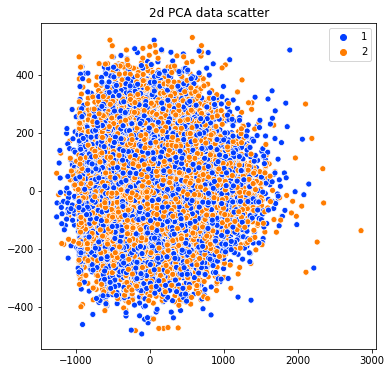

/Users/mjkim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


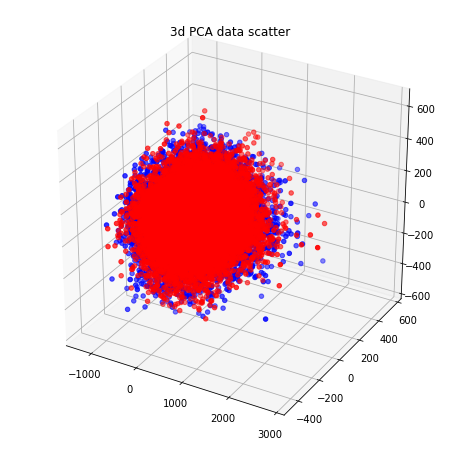

In [11]:
palette = sns.color_palette("bright", 2)
plt.figure(figsize=(6, 6))
sns.scatterplot(x = projected_pca2[:,0], y = projected_pca2[:,1], hue= train_y, legend='full', palette= palette)
plt.title("2d PCA data scatter")
plt.show()


projected_pca3_1 = projected_pca3[np.where(train_y==1)]
projected_pca3_2 = projected_pca3[np.where(train_y==2)]

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(projected_pca3_1[:,0], projected_pca3_1[:,1], projected_pca3_1[:,2], c= 'Blue', marker='o')
ax.scatter3D(projected_pca3_2[:,0], projected_pca3_2[:,1], projected_pca3_2[:,2], c= 'Red', marker='o')
plt.title("3d PCA data scatter")
fig.show()

In [12]:
def Various_Learning_algo(train_x, train_y, test_x, test_y):
  #KNN
  ks = (1,2,5,10)
  for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_x[:1000], train_y[:1000])
    prediction = knn_model.predict(test_x)
    score = knn_model.score(test_x, test_y)
    print("Raw data k=",k," accuracy: ", score)
    plt.bar(k,score)
  plt.show()

  #Random Forest
  Rand = (10,50,100)
  for R in Rand:  
    RF_model = RandomForestClassifier(n_estimators=R)
    RF_model.fit(train_x, train_y)

    print( "Random Forest Raw data accuracy: ", RF_model.score(test_x,test_y))
    RF_predicted = RF_model.predict(test_x)
    accuracy = accuracy_score(test_y, RF_predicted)
  

    cm = pd.DataFrame(confusion_matrix(test_y, RF_predicted))
    sns.heatmap(cm, annot=True, fmt='d')
    ax=plt.gca()
    ax.set_ylim(0, 2)
    plt.title('Random Forest Raw data (%d trees)'%(R) )
    plt.xlabel('predict value')
    plt.ylabel('answer value')
    plt.show()

  #Logistic Regression
  logreg_model = LogisticRegression()
  logreg_model.fit(train_x, train_y)
  logreg_predicted = logreg_model.predict(test_x)
  logreg_predicted_prob = logreg_model.predict_proba(test_x)
  accuracy = accuracy_score(test_y, logreg_predicted)
  print( "Logistic Regression Raw data accuracy: ", accuracy)

  return knn_model, RF_model, logreg_model

Raw data k= 1  accuracy:  0.512
Raw data k= 2  accuracy:  0.5083
Raw data k= 5  accuracy:  0.509
Raw data k= 10  accuracy:  0.4992


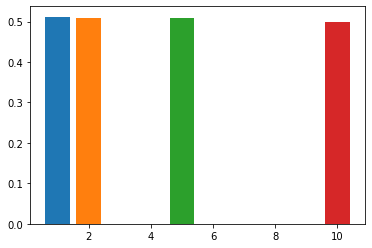

Random Forest Raw data accuracy:  0.9041


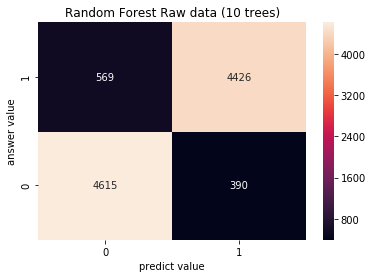

Random Forest Raw data accuracy:  0.9201


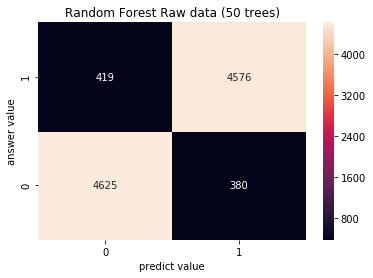

Random Forest Raw data accuracy:  0.9208


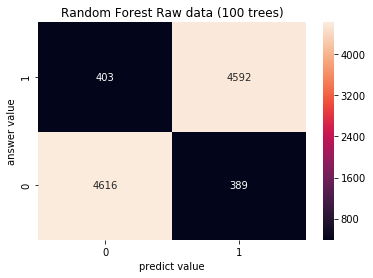

/Users/mjkim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Raw data accuracy:  0.867


In [13]:
Knn_model, RF_model, logreg_model = Various_Learning_algo(train_x, train_y, test_x, test_y)

Raw data k= 1  accuracy:  0.5005
Raw data k= 2  accuracy:  0.5035
Raw data k= 5  accuracy:  0.508
Raw data k= 10  accuracy:  0.5115


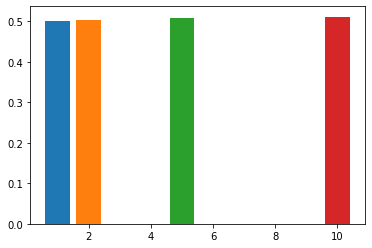

Random Forest Raw data accuracy:  0.5036


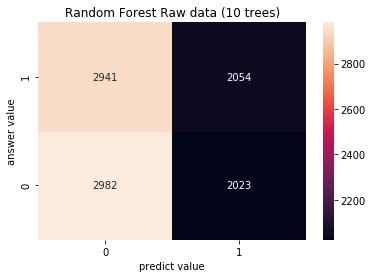

Random Forest Raw data accuracy:  0.5036


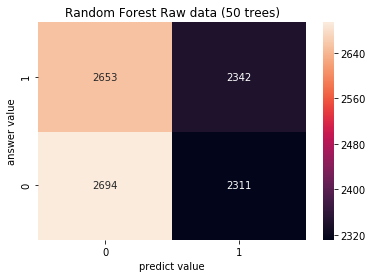

Random Forest Raw data accuracy:  0.5034


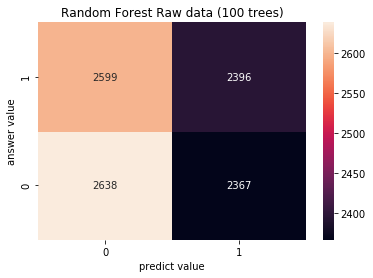

Logistic Regression Raw data accuracy:  0.5243


/Users/mjkim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
Knn_model_2d, RF_model_2d, logreg_model_2d = Various_Learning_algo(projected_pca2, train_y, projected_pca_test2, test_y)

Raw data k= 1  accuracy:  0.5078
Raw data k= 2  accuracy:  0.5052
Raw data k= 5  accuracy:  0.5071
Raw data k= 10  accuracy:  0.5117


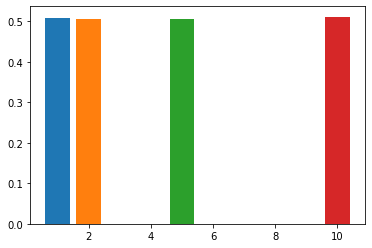

Random Forest Raw data accuracy:  0.5144


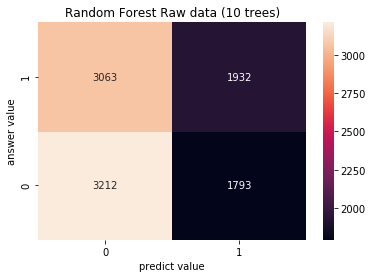

Random Forest Raw data accuracy:  0.5116


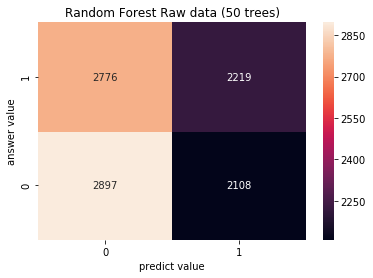

Random Forest Raw data accuracy:  0.5179


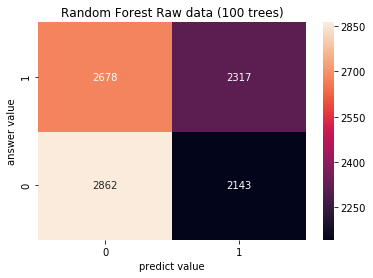

Logistic Regression Raw data accuracy:  0.5255


/Users/mjkim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
Knn_model_10d, RF_model_10d, logreg_model_10d = Various_Learning_algo(projected_pca10, train_y, projected_pca_test10, test_y)

In [16]:

from ipywidgets import TwoByTwoLayout
from ipywidgets import AppLayout
from ipywidgets import Button, Layout, jslink, IntText, IntSlider,Dropdown
import ipywidgets as widgets
import json
import numpy as np
options=[('One', 1), ('Two', 2), ('Three', 3)]

#champion dictionary
with open('champion_info.json') as json_file:
    json_data = json.load(json_file)

dic1 = {}

for x in json_data["data"].items():
  dic1.update( {x[1]['key'] : int(x[0])} )

dic1_sorted = sorted(dic1.items())

#spell dictionary
with open('summoner_spell_info.json') as json_file:
    json_data = json.load(json_file)

dic2 = {}

for x in json_data["data"].items():
  dic2.update( {x[1]['name'] : x[0]} )


t1_sum1 = widgets.Dropdown(options=dic1_sorted,description='T1 Summoner 1:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))
t1_sum2 = widgets.Dropdown(options=dic1_sorted,description='T1 Summoner 2:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))
t1_sum3 = widgets.Dropdown(options=dic1_sorted,description='T1 Summoner 3:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))
t1_sum4 = widgets.Dropdown(options=dic1_sorted,description='T1 Summoner 4:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))
t1_sum5 = widgets.Dropdown(options=dic1_sorted,description='T1 Summoner 5:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))
t2_sum1 = widgets.Dropdown(options=dic1_sorted,description='T2 Summoner 1:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))
t2_sum2 = widgets.Dropdown(options=dic1_sorted,description='T2 Summoner 2:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))
t2_sum3 = widgets.Dropdown(options=dic1_sorted,description='T2 Summoner 3:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))
t2_sum4 = widgets.Dropdown(options=dic1_sorted,description='T2 Summoner 4:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))
t2_sum5 = widgets.Dropdown(options=dic1_sorted,description='T2 Summoner 5:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))

t1_ban1 = widgets.Dropdown(options=dic1_sorted,layout=Layout(width='50', height='auto'))
t1_ban2 = widgets.Dropdown(options=dic1_sorted,layout=Layout(width='50', height='auto'))
t1_ban3 = widgets.Dropdown(options=dic1_sorted,layout=Layout(width='50', height='auto'))
t1_ban4 = widgets.Dropdown(options=dic1_sorted,layout=Layout(width='50', height='auto'))
t1_ban5 = widgets.Dropdown(options=dic1_sorted,layout=Layout(width='50', height='auto'))

t2_ban1 = widgets.Dropdown(options=dic1_sorted,layout=Layout(width='50', height='auto'))
t2_ban2 = widgets.Dropdown(options=dic1_sorted,layout=Layout(width='50', height='auto'))
t2_ban3 = widgets.Dropdown(options=dic1_sorted,layout=Layout(width='50', height='auto'))
t2_ban4 = widgets.Dropdown(options=dic1_sorted,layout=Layout(width='50', height='auto'))
t2_ban5 = widgets.Dropdown(options=dic1_sorted,layout=Layout(width='50', height='auto'))

t1_sum1_spell1 = widgets.Dropdown(options=dic2,description='Spell 1:',layout=Layout(width='20%', height='auto'))
t1_sum1_spell2 = widgets.Dropdown(options=dic2,description='Spell 2:',layout=Layout(width='20%', height='auto'))
t1_sum2_spell1 = widgets.Dropdown(options=dic2,description='Spell 1:',layout=Layout(width='20%', height='auto'))
t1_sum2_spell2 = widgets.Dropdown(options=dic2,description='Spell 2:',layout=Layout(width='20%', height='auto'))
t1_sum3_spell1 = widgets.Dropdown(options=dic2,description='Spell 1:',layout=Layout(width='20%', height='auto'))
t1_sum3_spell2 = widgets.Dropdown(options=dic2,description='Spell 2:',layout=Layout(width='20%', height='auto'))
t1_sum4_spell1 = widgets.Dropdown(options=dic2,description='Spell 1:',layout=Layout(width='20%', height='auto'))
t1_sum4_spell2 = widgets.Dropdown(options=dic2,description='Spell 2:',layout=Layout(width='20%', height='auto'))
t1_sum5_spell1 = widgets.Dropdown(options=dic2,description='Spell 1:',layout=Layout(width='20%', height='auto'))
t1_sum5_spell2 = widgets.Dropdown(options=dic2,description='Spell 2:',layout=Layout(width='20%', height='auto'))


t2_sum1_spell1 = widgets.Dropdown(options=dic2,description='Spell 1:',layout=Layout(width='20%', height='auto'))
t2_sum1_spell2 = widgets.Dropdown(options=dic2,description='Spell 2:',layout=Layout(width='20%', height='auto'))
t2_sum2_spell1 = widgets.Dropdown(options=dic2,description='Spell 1:',layout=Layout(width='20%', height='auto'))
t2_sum2_spell2 = widgets.Dropdown(options=dic2,description='Spell 2:',layout=Layout(width='20%', height='auto'))
t2_sum3_spell1 = widgets.Dropdown(options=dic2,description='Spell 1:',layout=Layout(width='20%', height='auto'))
t2_sum3_spell2 = widgets.Dropdown(options=dic2,description='Spell 2:',layout=Layout(width='20%', height='auto'))
t2_sum4_spell1 = widgets.Dropdown(options=dic2,description='Spell 1:',layout=Layout(width='20%', height='auto'))
t2_sum4_spell2 = widgets.Dropdown(options=dic2,description='Spell 2:',layout=Layout(width='20%', height='auto'))
t2_sum5_spell1 = widgets.Dropdown(options=dic2,description='Spell 1:',layout=Layout(width='20%', height='auto'))
t2_sum5_spell2 = widgets.Dropdown(options=dic2,description='Spell 2:',layout=Layout(width='20%', height='auto'))


In [17]:

class color:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


print(color.BOLD + "Game info:"+ color.END)
print()
time = widgets.IntSlider(step = 10, max = 60, description = "Game duration (min)", style={'description_width': 'initial'})
display(time)
print("1: team1     2: team2")

firstblood = widgets.IntSlider(min = 1, max = 2, description = "First Blood")
firsttower = widgets.IntSlider(min = 1, max = 2, description = "First Tower")
firstinhi = widgets.IntSlider(min = 1, max = 2, description = "First Inhibiter")
ui1 = widgets.HBox([firstblood, firsttower, firstinhi])
display(ui1)

firstdragon = widgets.IntSlider(min = 1, max = 2, description = "First Dragon")
firstherald = widgets.IntSlider(min = 1, max = 2, description = "First Herald")
firstbaron = widgets.IntSlider(min = 1, max = 2, description = "First Baron")
ui2 = widgets.HBox([firstdragon, firstherald, firstbaron])
display(ui2)

print()
print(color.BOLD + "Team1 Champions:")
t1_sum1_ui = widgets.HBox([t1_sum1, t1_sum1_spell1, t1_sum1_spell2])
t1_sum2_ui = widgets.HBox([t1_sum2, t1_sum2_spell1, t1_sum2_spell2])
t1_sum3_ui = widgets.HBox([t1_sum3, t1_sum3_spell1, t1_sum3_spell2])
t1_sum4_ui = widgets.HBox([t1_sum4, t1_sum4_spell1, t1_sum4_spell2])
t1_sum5_ui = widgets.HBox([t1_sum5, t1_sum5_spell1, t1_sum5_spell2])
t1_ban_ui = widgets.HBox([t1_ban1, t1_ban2, t1_ban3, t1_ban4, t1_ban5])
display(t1_sum1_ui)
display(t1_sum2_ui)
display(t1_sum3_ui)
display(t1_sum4_ui)
display(t1_sum5_ui)
print(color.BOLD + "Team 1 bans:")
display(t1_ban_ui)
print(color.BOLD + "Team 1 game info:")
t1_dragonkills = widgets.IntSlider(min = 0, max = 6, description = "Dragon kills")
t1_heraldkills = widgets.IntSlider(min = 0, max = 1, description = "Herald kills")
t1_baronkills = widgets.IntSlider(min = 0, max = 5, description = "Baron kills")
t1_info_ui = widgets.HBox([t1_dragonkills, t1_heraldkills, t1_baronkills])
display(t1_info_ui)


print()
print()
print(color.BOLD + "Team2 Champions:")
t2_sum1_ui = widgets.HBox([t2_sum1, t2_sum1_spell1, t2_sum1_spell2])
t2_sum2_ui = widgets.HBox([t2_sum2, t2_sum2_spell1, t2_sum2_spell2])
t2_sum3_ui = widgets.HBox([t2_sum3, t2_sum3_spell1, t2_sum3_spell2])
t2_sum4_ui = widgets.HBox([t2_sum4, t2_sum4_spell1, t2_sum4_spell2])
t2_sum5_ui = widgets.HBox([t2_sum5, t2_sum5_spell1, t2_sum5_spell2])
t2_ban_ui = widgets.HBox([t2_ban1, t2_ban2, t2_ban3, t2_ban4, t2_ban5])
display(t2_sum1_ui)
display(t2_sum2_ui)
display(t2_sum3_ui)
display(t2_sum4_ui)
display(t2_sum5_ui)
print(color.BOLD + "Team 2 bans:")
display(t2_ban_ui)
print(color.BOLD + "Team 2 game info:")
t2_dragonkills = widgets.IntSlider(min = 0, max = 6, description = "Dragon kills")
t2_heraldkills = widgets.IntSlider(min = 0, max = 1, description = "Herald kills")
t2_baronkills = widgets.IntSlider(min = 0, max = 5, description = "Baron kills")
t2_info_ui = widgets.HBox([t2_dragonkills, t2_heraldkills, t2_baronkills])
display(t2_info_ui)

Game info:



IntSlider(value=0, description='Game duration (min)', max=60, step=10, style=SliderStyle(description_width='in…

1: team1     2: team2



Team1 Champions:


Team 1 bans:


Team 1 game info:




Team2 Champions:


Team 2 bans:


Team 2 game info:


In [18]:
sample = np.array([time.value,firstblood.value, firsttower.value, firstinhi.value,
                       firstbaron.value, firstdragon.value,firstherald.value, 
                       t1_sum1.value, t1_sum1_spell1.value, t1_sum1_spell2.value,
                       t1_sum2.value, t1_sum2_spell1.value, t1_sum2_spell2.value,
                       t1_sum3.value, t1_sum3_spell1.value, t1_sum3_spell2.value,
                       t1_sum4.value, t1_sum4_spell1.value, t1_sum4_spell2.value,
                       t1_sum5.value, t1_sum5_spell1.value, t1_sum5_spell2.value,
                       t1_baronkills.value, t1_dragonkills.value, t1_heraldkills.value,
                       t1_ban1.value, t1_ban2.value, t1_ban3.value, t1_ban4.value, t1_ban5.value,
                       t2_sum1.value, t2_sum1_spell1.value, t2_sum1_spell2.value,
                       t2_sum2.value, t2_sum2_spell1.value, t2_sum2_spell2.value,
                       t2_sum3.value, t2_sum3_spell1.value, t2_sum3_spell2.value,
                       t2_sum4.value, t2_sum4_spell1.value, t2_sum4_spell2.value,
                       t2_sum5.value, t2_sum5_spell1.value, t2_sum5_spell2.value,
                       t2_baronkills.value, t2_dragonkills.value, t2_heraldkills.value,
                       t2_ban1.value, t2_ban2.value, t2_ban3.value, t2_ban4.value, t2_ban5.value])
    
sample = [int(i) for i in sample]
sample = np.array(sample).reshape(1,53)

In [19]:
model_select = widgets.Dropdown(options=("Knn","Random Forest", "Logistic Regression"),description='Model Selection:',style={'description_width': 'initial'},layout=Layout(width='50', height='auto'))
display(model_select)

Dropdown(description='Model Selection:', layout=Layout(height='auto', width='50'), options=('Knn', 'Random For…

Knn model prediction:  [0.9 0.1]


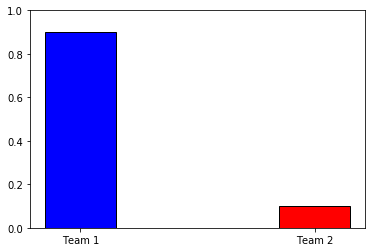

In [21]:
if model_select.value == 'Knn':
    predicted = Knn_model.predict_proba(sample)
    predicted = predicted[0]
    print("Knn model prediction: ", predicted)
    plt.bar("Team 1", predicted[0], color= 'Blue', width = .3, edgecolor = 'black')
    plt.bar("Team 2", predicted[1], color= 'Red', width = .3, edgecolor = 'black')
    plt.ylim(0,1)
    plt.show()


if model_select.value == 'Random Forest':
    predicted = RF_model.predict_proba(sample)
    predicted = predicted[0]
    print("Random Forest model prediction: ", predicted)
    plt.bar("Team 1", predicted[0], color= 'Blue', width = .3, edgecolor = 'black')
    plt.bar("Team 2", predicted[1], color= 'Red', width = .3, edgecolor = 'black')
    plt.ylim(0,1)
    plt.show()


if model_select.value == 'Logistic Regression':
    predicted = logreg_model.predict_proba(sample)
    predicted = predicted[0]
    print("Logistic Regression model prediction: ", predicted)
    plt.bar("Team 1", predicted[0], color= 'Blue', width = .3, edgecolor = 'black')
    plt.bar("Team 2", predicted[1], color= 'Red', width = .3, edgecolor = 'black')
    plt.ylim(0,1)
    plt.show()

In [22]:
from sklearn.metrics import classification_report
print("Classfication reprot Random Forest\n")
print(classification_report(test_y, RF_model.predict(test_x)))
print()
print("Classfication reprot Logistic Regression Forest\n")
print(classification_report(test_y, logreg_model.predict(test_x)))

Classfication reprot Random Forest

              precision    recall  f1-score   support

           1       0.92      0.92      0.92      5005
           2       0.92      0.92      0.92      4995

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Classfication reprot Logistic Regression Forest

              precision    recall  f1-score   support

           1       0.85      0.89      0.87      5005
           2       0.89      0.84      0.86      4995

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

